In [1]:
import pandas as pd
dat=pd.read_csv('data/cleaned_data.csv')

In [2]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3562 non-null   int64 
 1   date          3562 non-null   object
 2   age_group     3562 non-null   object
 3   covid_deaths  3562 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 111.4+ KB


In [3]:
dat['date']= pd.to_datetime(dat['date'])

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3562 entries, 0 to 3561
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    3562 non-null   int64         
 1   date          3562 non-null   datetime64[ns]
 2   age_group     3562 non-null   object        
 3   covid_deaths  3562 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 111.4+ KB


In [5]:
dat.to_csv('data/cleaned_data.csv',index=False)

In [6]:
data=pd.read_csv('data/cleaned_data.csv',index_col=['date'], parse_dates=['date'])

In [7]:
data.head(5)

,Unnamed: 0,age_group,covid_deaths
date,,,
2020-03-16,0,60-69,1
2020-03-17,1,70-79,1
2020-03-17,2,80+,1
2020-03-18,3,80+,1
2020-03-20,4,30-39,1


In [8]:
group1 = data.loc[data['age_group'] == '0-19']
group2 = data.loc[data['age_group'] == '20-29']
group3 = data.loc[data['age_group'] == '30-39']
group4 = data.loc[data['age_group'] == '40-49']
group5 = data.loc[data['age_group'] == '50-59']
group6 = data.loc[data['age_group'] == '60-69']
group7 = data.loc[data['age_group'] == '70-79']
group8 = data.loc[data['age_group'] == '80+']
    

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white',color_codes=True)

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook
from tqdm.notebook import tqdm



from itertools import product

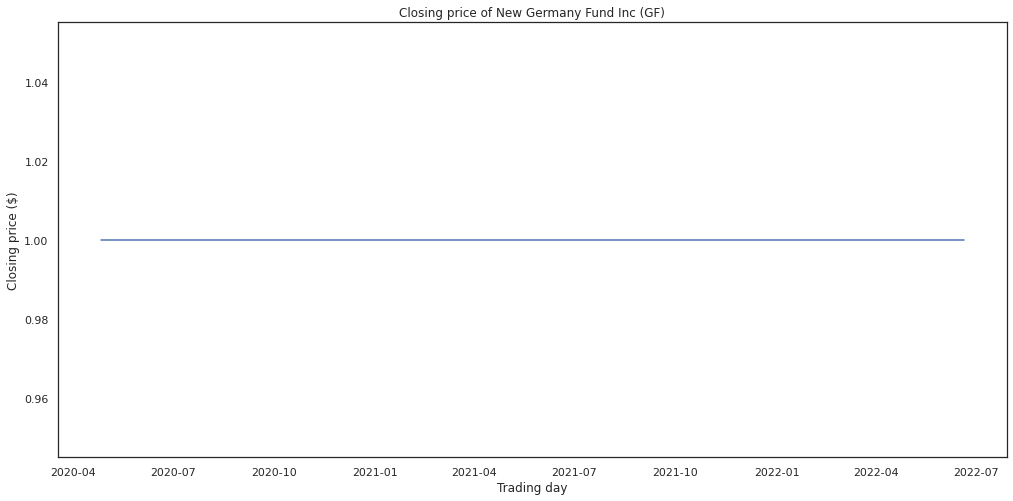

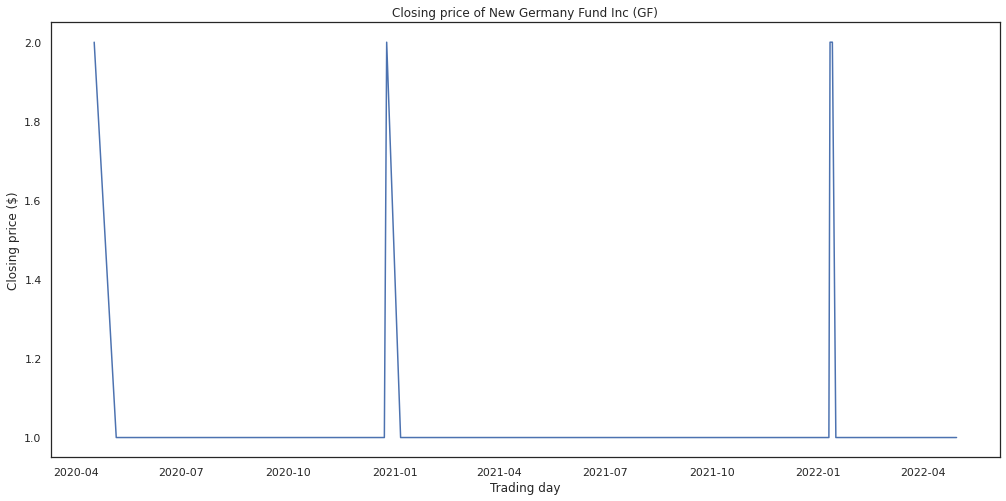

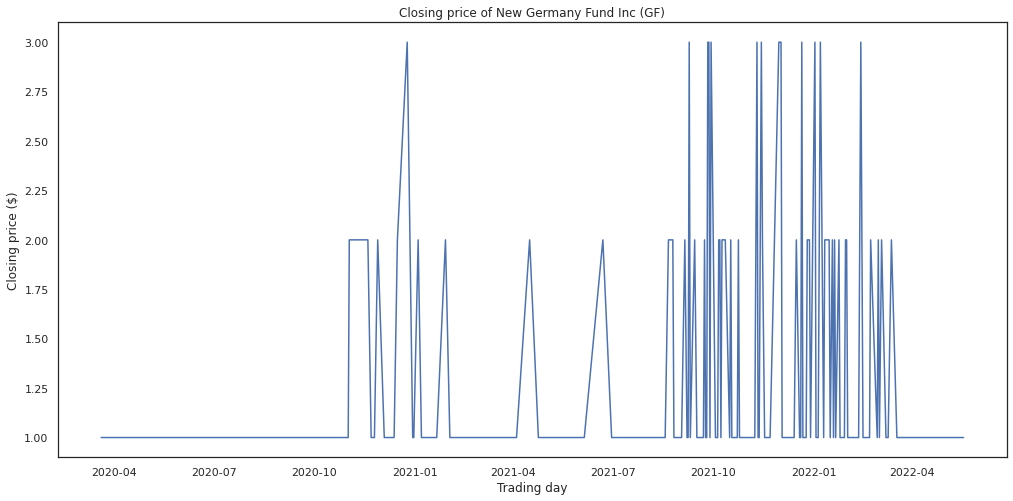

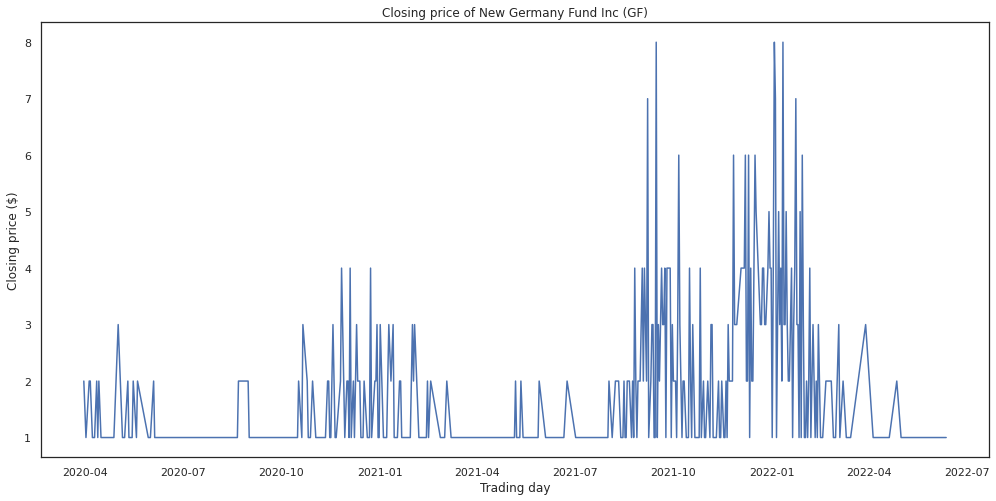

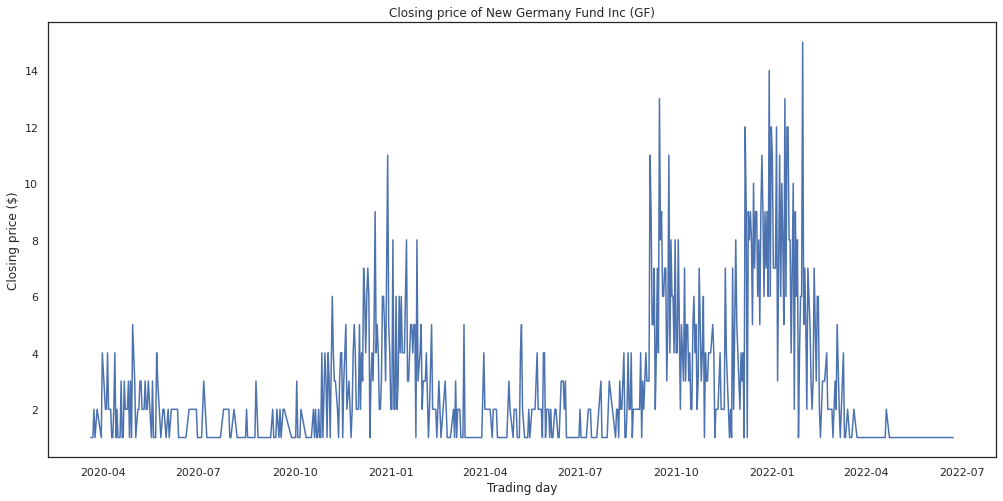

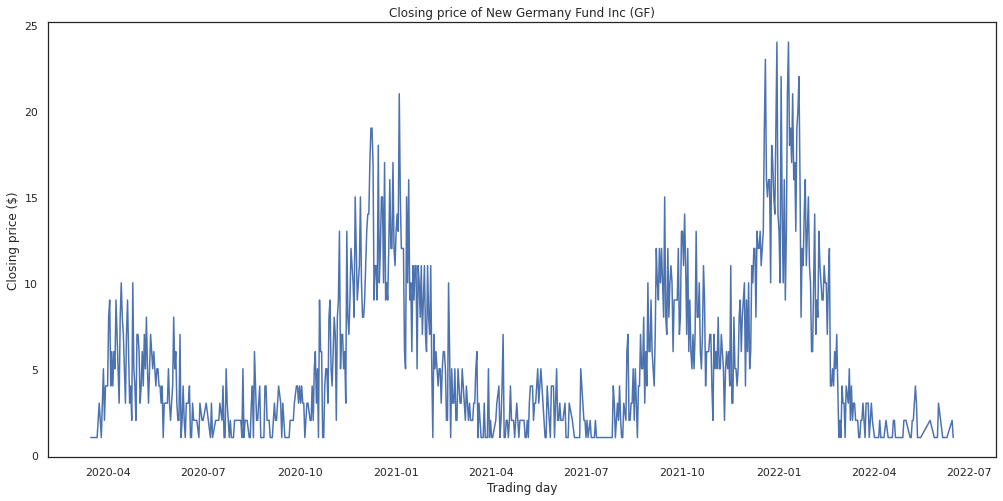

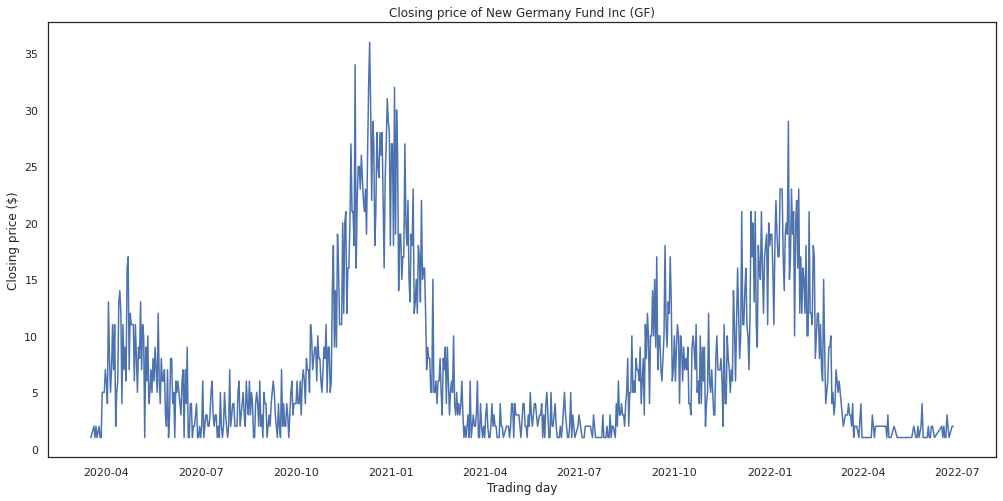

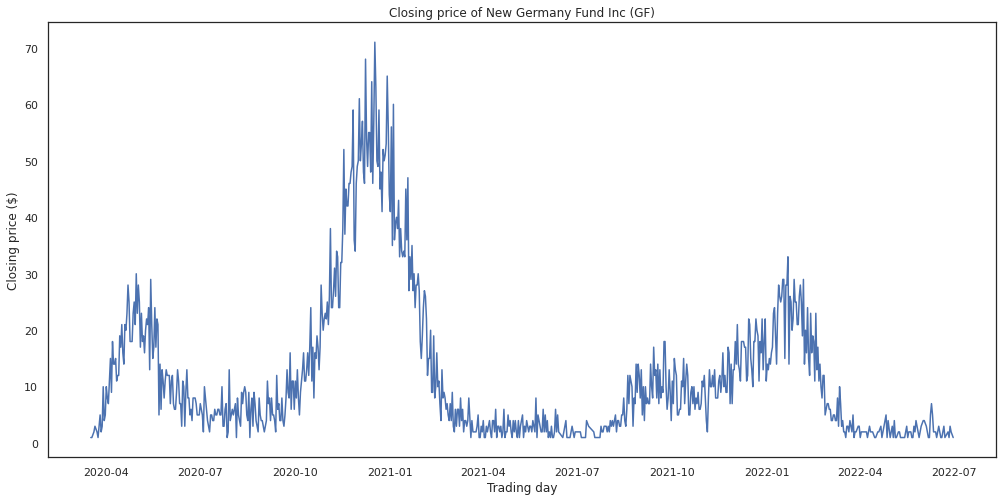

In [13]:
plt.figure(figsize=(17, 8))
plt.plot(group1.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group2.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group3.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group4.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group5.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group6.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group7.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.figure(figsize=(17, 8))
plt.plot(group8.covid_deaths)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
# plt.show()

plt.show()

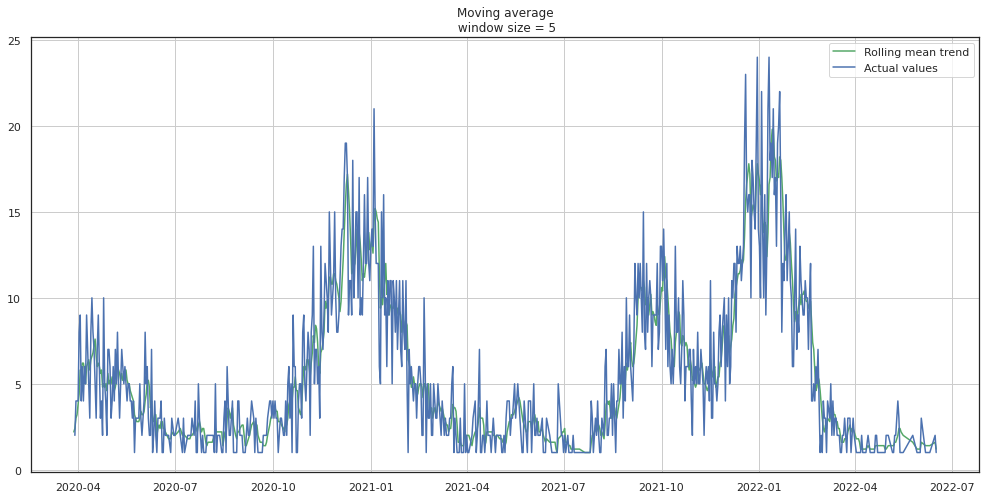

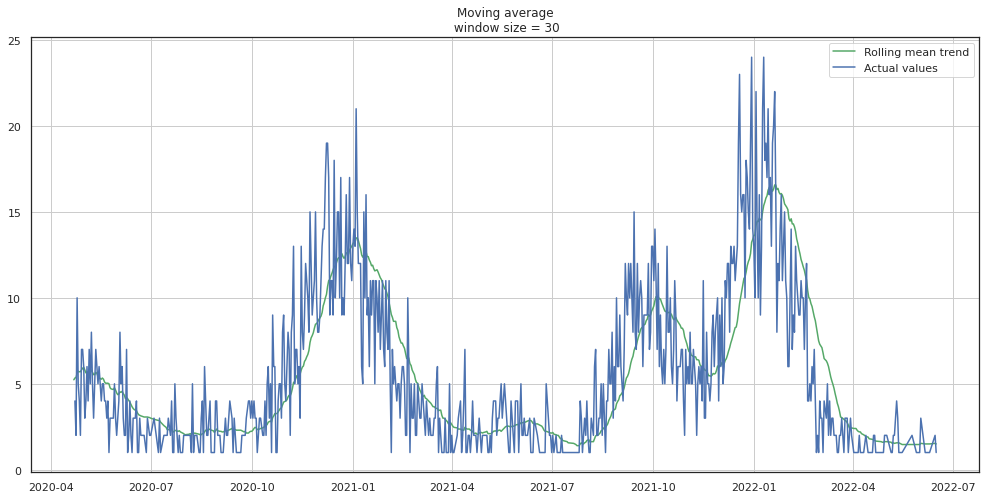

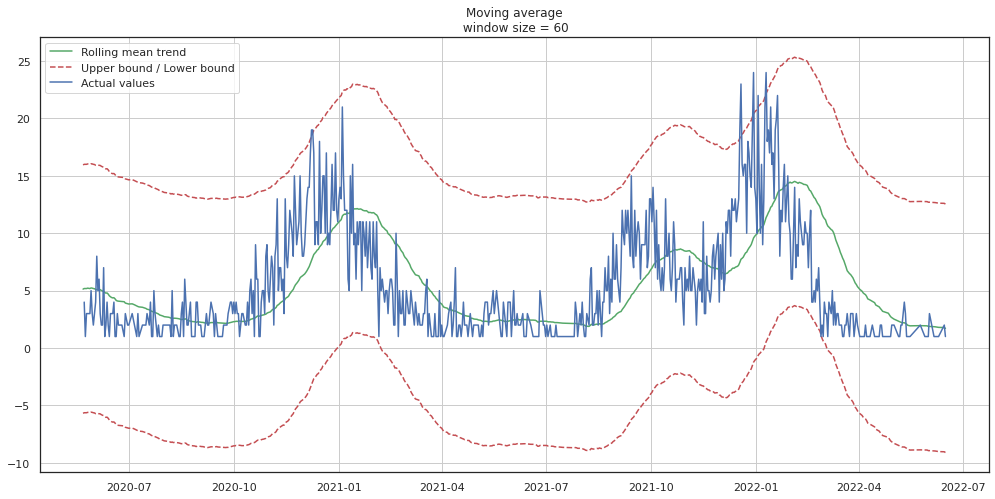

In [14]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(group6.covid_deaths, 5)

#Smooth by the previous month (30 days)
plot_moving_average(group6.covid_deaths, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(group6.covid_deaths, 60, plot_intervals=True)

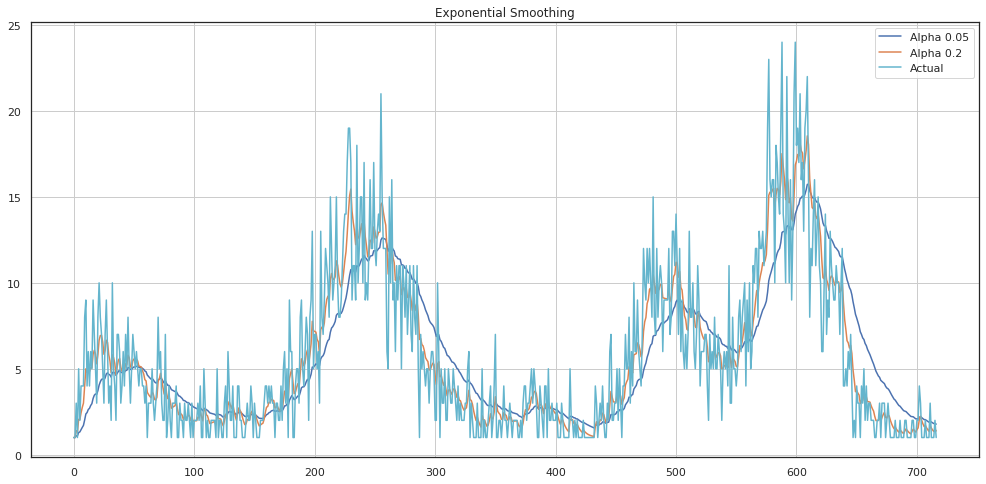

In [16]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result
  
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

plot_exponential_smoothing(group6.covid_deaths, [0.05, 0.2])

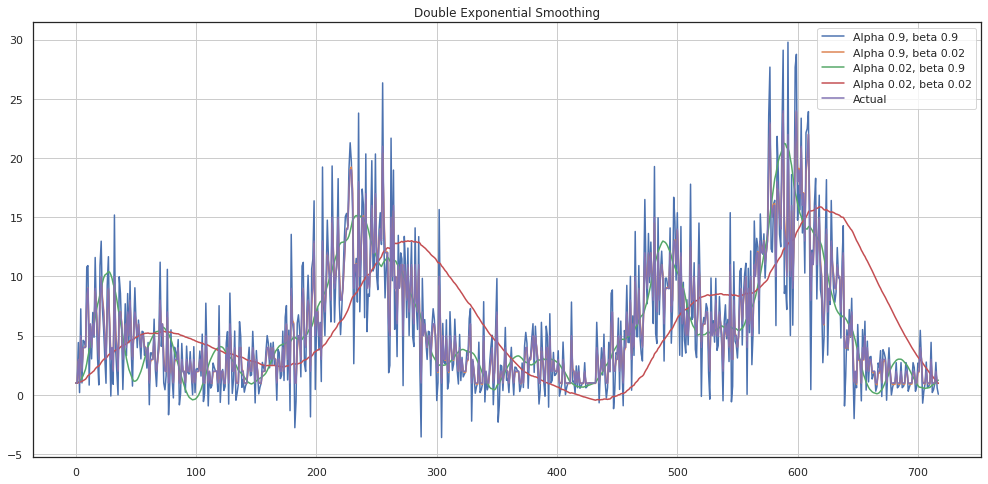

In [17]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(group6.covid_deaths, alphas=[0.9, 0.02], betas=[0.9, 0.02])

Modelling

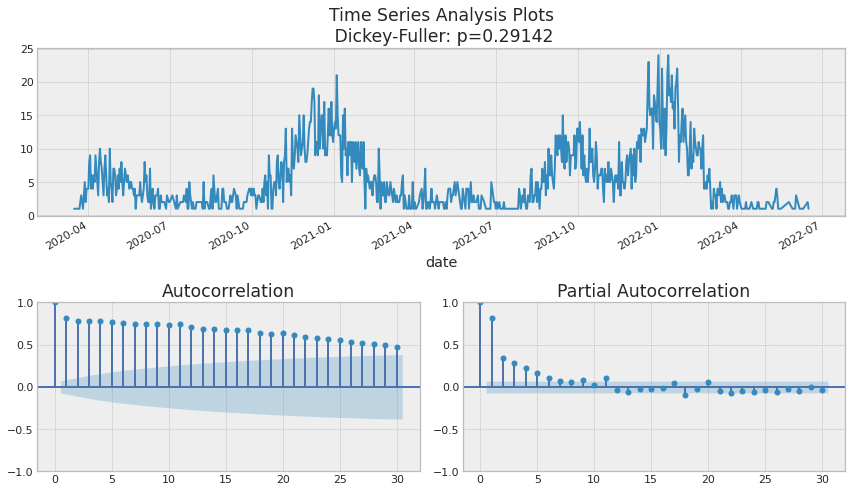

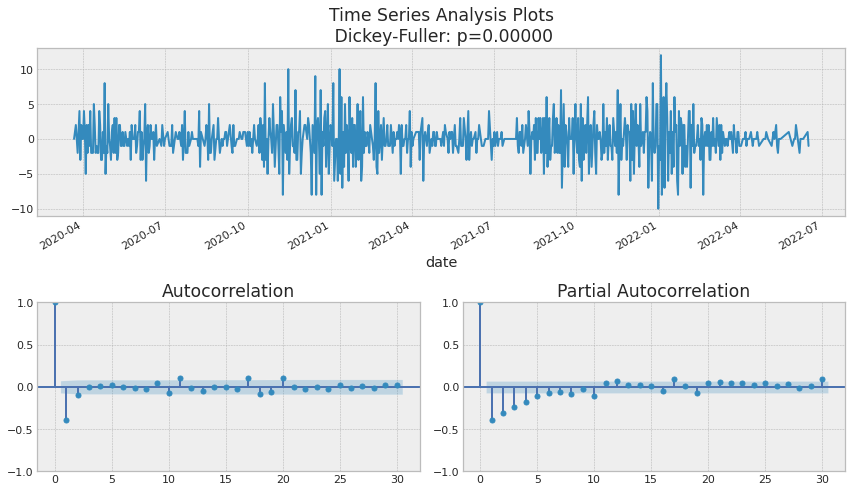

In [50]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(group6.covid_deaths, lags=30)

# Take the first difference to remove to make the process stationary
data_diff = group6.covid_deaths - group6.covid_deaths.shift(1)

tsplot(data_diff[1:], lags=30)

Markdown

In [48]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Train many SARIMA models to find the best set of parameters
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(group6.covid_deaths, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

# result_table = optimize_SARIMA(parameters_list, d, D, s)

#Set parameters that give the lowest AIC (Akaike Information Criteria)
# p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(group6.covid_deaths, order=(1, 1, 1),
                                       seasonal_order=(1, 1, 1, 7)).fit(disp=-1)

print(best_model.summary())

/home/collins/Downloads/project/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/collins/Downloads/project/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                      covid_deaths   No. Observations:                  717
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1625.256
Date:                           Fri, 08 Jul 2022   AIC                           3260.511
Time:                                   01:53:06   BIC                           3283.331
Sample:                                        0   HQIC                          3269.327
                                           - 717                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.040      2.623      0.009       0.026       0.182
ma.L1         -0.7774      0.027    -29.123

In [31]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

/home/collins/Downloads/project/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/collins/Downloads/project/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: 2.271182
         Iterations: 3
         Function evaluations: 117


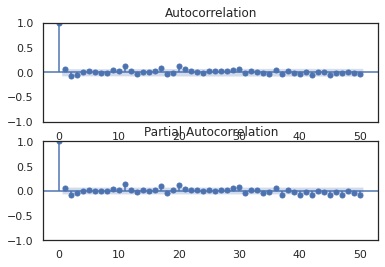

In [32]:
# model = sm.tsa.statespace.SARIMAX(group6.covid_deaths, order=(0,1,1), 
#                                   seasonal_order(0,1,1,7))
#                                  .fit(max_iter=50, method='powell')
model= sm.tsa.statespace.SARIMAX(group6.covid_deaths, order=(0, 1, 1),
                                       seasonal_order=(0, 1, 1, 8)).fit(max_iter=50, method='powell')

res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()